
# Spatial coherence

Spatial coherence on the Piton de la Fournaise volcano. We here reproduce a part of the result published in [Seydoux et al. (2016)](https://academic.oup.com/gji/article/204/3/1430/677678), and revisited over this particular time period in [Journeau et al. (2022)](https://www.sciencedirect.com/science/article/abs/pii/S0012821X23003369). In this example, the processing is made in two domains: first in the time domain with a smoothing of the envelope of the signal, and then in the frequency domain with the estimation of the covariance matrix.


In [1]:
import covseisnet as csn

## Read and pre-process stream

The stream is read and pre-processed by detrending, tapering, and highpass filtering. Several other pre-processing methods are available in the `covseisnet.stream.NetworkStream` classs. The stream is then whitened using the method `covseisnet.stream.NetworkStream.whiten`. The method requires a window duration in seconds and a smooth length to smooth the spectral whitening.

In [2]:
# Path to the example stream
filepath_waveforms = "../data/undervolc.mseed"

# Read example stream
stream = csn.read(filepath_waveforms)
stream.filter("highpass", freq=0.5)
stream.time_normalize(method="smooth", smooth_length=1001)
stream.taper(max_percentage=0.01)

15 Trace(s) in NetworkStream (synced):
YA.UV01.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV02.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV03.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV04.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV05.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV06.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV07.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV08.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV09.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-10-14T15:59:59.950000Z | 20.0 Hz, 504000 samples
YA.UV10.00.HHZ | 2010-10-14T09:00:00.000000Z - 2010-

## Covariance matrix

The covariance matrix is calculated using the method `covseisnet.covariance.calculate_covariance_matrix`. The method returns the times, frequencies, and covariances of the covariance matrix. Among the parameters of the method, the window duration and the number of windows are important to consider. The window duration is the length of the Fourier estimation window in seconds, and the number of windows is the number of windows to average to estimate the covariance matrix.

We can then visualize the covariance matrix at a given time and frequency, and its corresponding eigenvalues.

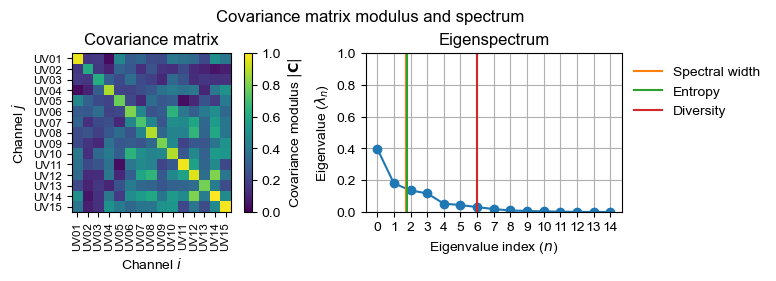

In [3]:
# Calculate covariance matrix
times, frequencies, covariances = csn.calculate_covariance_matrix(
    stream, window_duration=20, average=20, whiten="slice"
)

# Show covariance from sample window and frequency
t_index = 60
f_index = 100
fig, ax = csn.plot.covariance_matrix_modulus_and_spectrum(covariances[t_index, f_index])
fig.suptitle("Covariance matrix modulus and spectrum");

## Spectral width

We here extract the coherence from the covariance matrix. The coherence is calculated using the method  `covseisnet.covariance.CovarianceMatrix.coherence`. It can either measure the spectral width of the eigenvalue distribution at each frequency, or with applying the formula of the Neumann entropy.

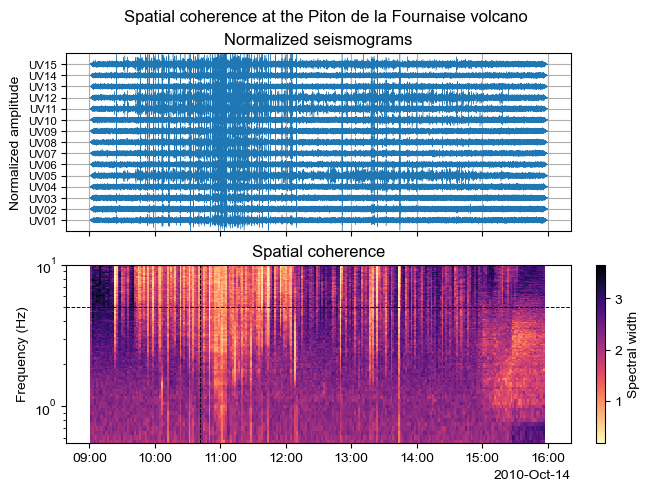

In [4]:
# Calculate coherence
coherence = covariances.coherence(kind="spectral_width")

# Show
fig, ax = csn.plot.stream_and_coherence(
    stream,
    times,
    frequencies,
    coherence,
    f_min=0.5,
)

# Mark extracted time and frequency
ax[1].axvline(times[t_index], color="k", linestyle="--", lw=0.7)
ax[1].axhline(frequencies[f_index], color="k", linestyle="--", lw=0.7)
fig.suptitle("Spatial coherence at the Piton de la Fournaise volcano");